# Evaluating Classical and State-of-the-Art Covariance Matrix Estimation Methods
Luiz Fernando F. Medeiros

This work evaluates the performance of different estimators in the domain of Portfolio Optimization. Three different estimators, namely sample based, Ledoit-Wolf (LWE), and Rotationally Invariant Estimator (RIE) are evaluated on their ability to approximate Covariance matrices, as well as how these Covariance matrix approximation affect the portfolio optimization process.

## Libraries

First the necessary libraries will be imported: 

In [11]:
%matplotlib inline 

In [12]:

import sqlalchemy as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import scipy as sci
import cvxpy as cp
from cvxopt import matrix, solvers
import sklearn.covariance as sk_cov
from pdb import set_trace as bp

In [2]:
home_dir = os.path.expandvars("$HOME")
app_src_dir = '/dev/repos/classes/portfolio_research_project/BackTestingSystem'
sys.path.insert(0, home_dir + app_src_dir)
print(home_dir + app_src_dir)

/u/54/medeirl1/unix/dev/repos/classes/portfolio_research_project/BackTestingSystem


In [3]:
from BackTestingSystem import bt
import StrategyResources as strat_res
import pyRMT.pyRMT as rmt

## Strategies: 

### Load random data and real data 

In [4]:
start_date = "2000-01-01"
end_date = '2019-01-01'
test_container = None
strategy_container = None
result = None

In [5]:
data = pd.read_pickle('data.pckl')
table_names = data.columns

### Backtesting with varying number of assets

The test below demonstrates the results where the number of assets and covariance estimation methods varies. Namely the number of assets is the following list: [10, 40, 70, 100, 130, 170, 200].
The covariance method estimator tested are: SCE, LWE and RIE. Finally, a Global Mean Variance Portfolio Optimization method is used, so to find the portfolio containing the method of minimum variance.
<i>The goal with the test below is to evaluate mainly the covariance matrix estimators. </i>

For the purposes of evaluation the estimators, we have produced backtests that evaluate the performance given different number of assets for every estimator in question. The graphs chosen to display information is the portfolio return graph titled "Equity Progression", "Return vs Test Name", and "Optimum vs Date". 

### Equity Progression

For "Equity Progression", it is possible to see how the different portfolio strategies progressed over time. This allows the reader to evaluate the general dynamics of the chosen strategies. 

### Return vs Test Name

The final return is plotted vs the specific strategy name. In general, this highlights which strategy produced the higher benefits during the time frame tested. 

### Value added vs Test Name

Here the goal is to evaluate whether or not the estimator in question provides any more value than the reference estimator. For this set of tests, the reference estimator is SCE. Therefore, it is possible to see that the added value for SCE is 0. It is kept on the graph as a form to separate between sets of tests. 

### Optimum vs Date

This graph demonstrate the Optimum value achieved at every rebalancing event. Therefore, if every month there is rebalancing, the Optimum of the Portfolio Optimization strategy used a that point is recorded. 

The goal with this information is to evaluate how the different strategies perform over time on its specific goal. For example, Global Mean Variance Portfolio, "gmvp", should produce very low optimum values (variance) for the portfolio. If an estimator is particularly good at helping this strategy reach lower optimum values, than it is more suitable for that strategy.

### Consider Lookback Time Windows:
For different number of assets, we also consider different number of lookback time windows. However, for this experiment, we maintain the strategy of GMVP, along with the Ledoit-Wolf estimator. For these tests, we are interested in evaluating which number of assets and lookback window brings the smallest average risk. 

In [7]:
weight_strategy_names = ['gmvp']

covariance_methods = ['ledoit-wolf']
number_of_assets = [10, 50 , 100, 150, 200]
lookback_periods=[pd.DateOffset(months=1), pd.DateOffset(months=3), pd.DateOffset(months=6),
                  pd.DateOffset(months=9), pd.DateOffset(months=12),
                 ]
lag_times = [pd.DateOffset(months=0)]
# q is quantity (number of shares)
# p is price
#commission_fn_a = lambda q, p: q * p * 0.002
commission_functions = [None]
strat_res.OPTIMUM_CONTAINER = {'date': [], 'value': []}
strategy_container, test_container = strat_res.build_test(number_of_assets, 
                data,
                # optimum_container=optimum_container, 
                covariance_methods=covariance_methods,
                weight_strategy_names=weight_strategy_names, 
                commission_functions=commission_functions,
                lookback_periods=lookback_periods, lag_times=lag_times,
                add_random_strategy=False, add_one_over_n_strategy=False,)
result = bt.run(*test_container)
strat_res.show_results(result, covariance_methods, test_container, show_return_graph=True,
                       show_value_added_graph=False,
                       show_optimum_graph=True, 
                      show_optimum_vs_period_graph=True)

final number of observations: 4409
final number of observations: 4409
final number of observations: 4409
final number of observations: 4409
final number of observations: 4409

ledoit-wolf_gmvp<DateOffset: months=1>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=3>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=9>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=12>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=1>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=3>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: mo

0

<Figure size 432x288 with 0 Axes>

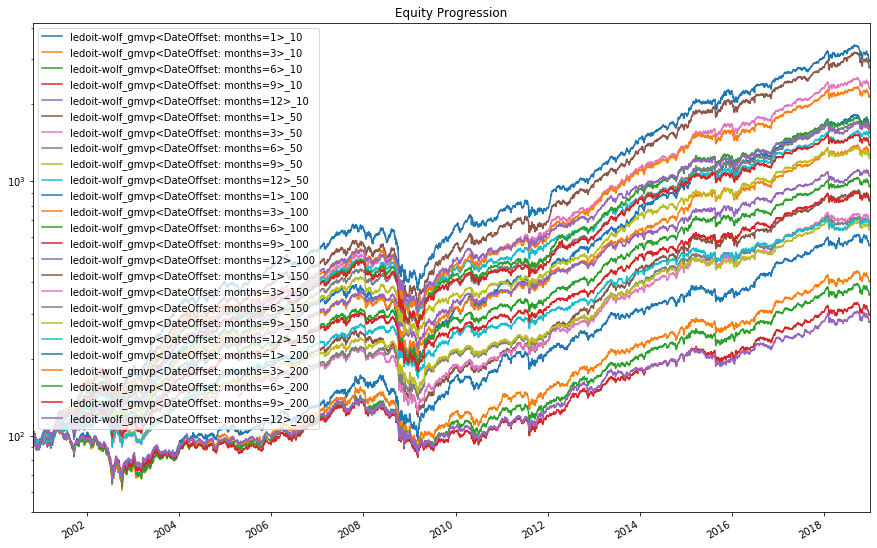

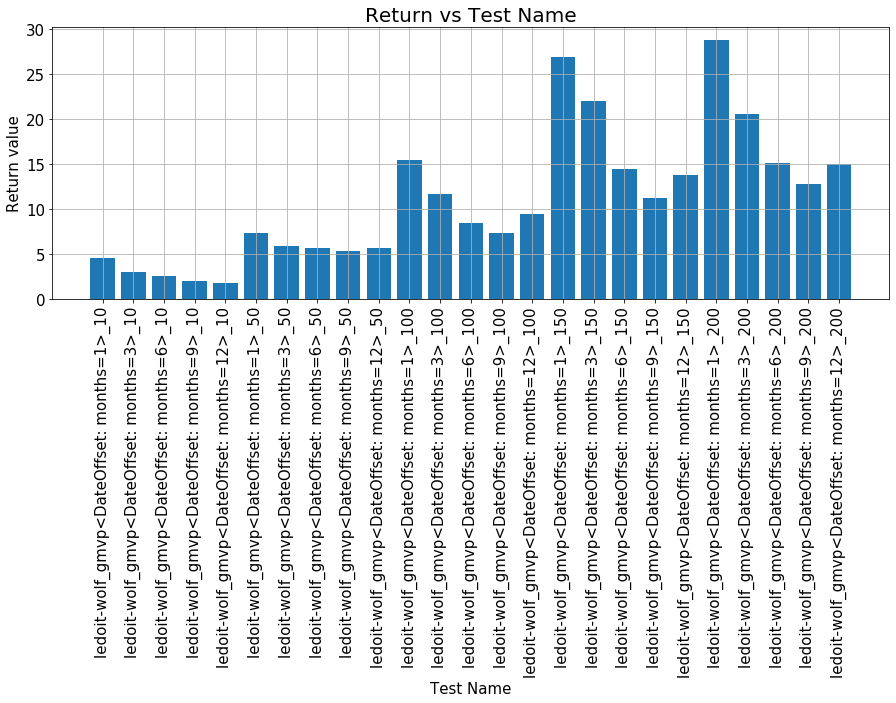

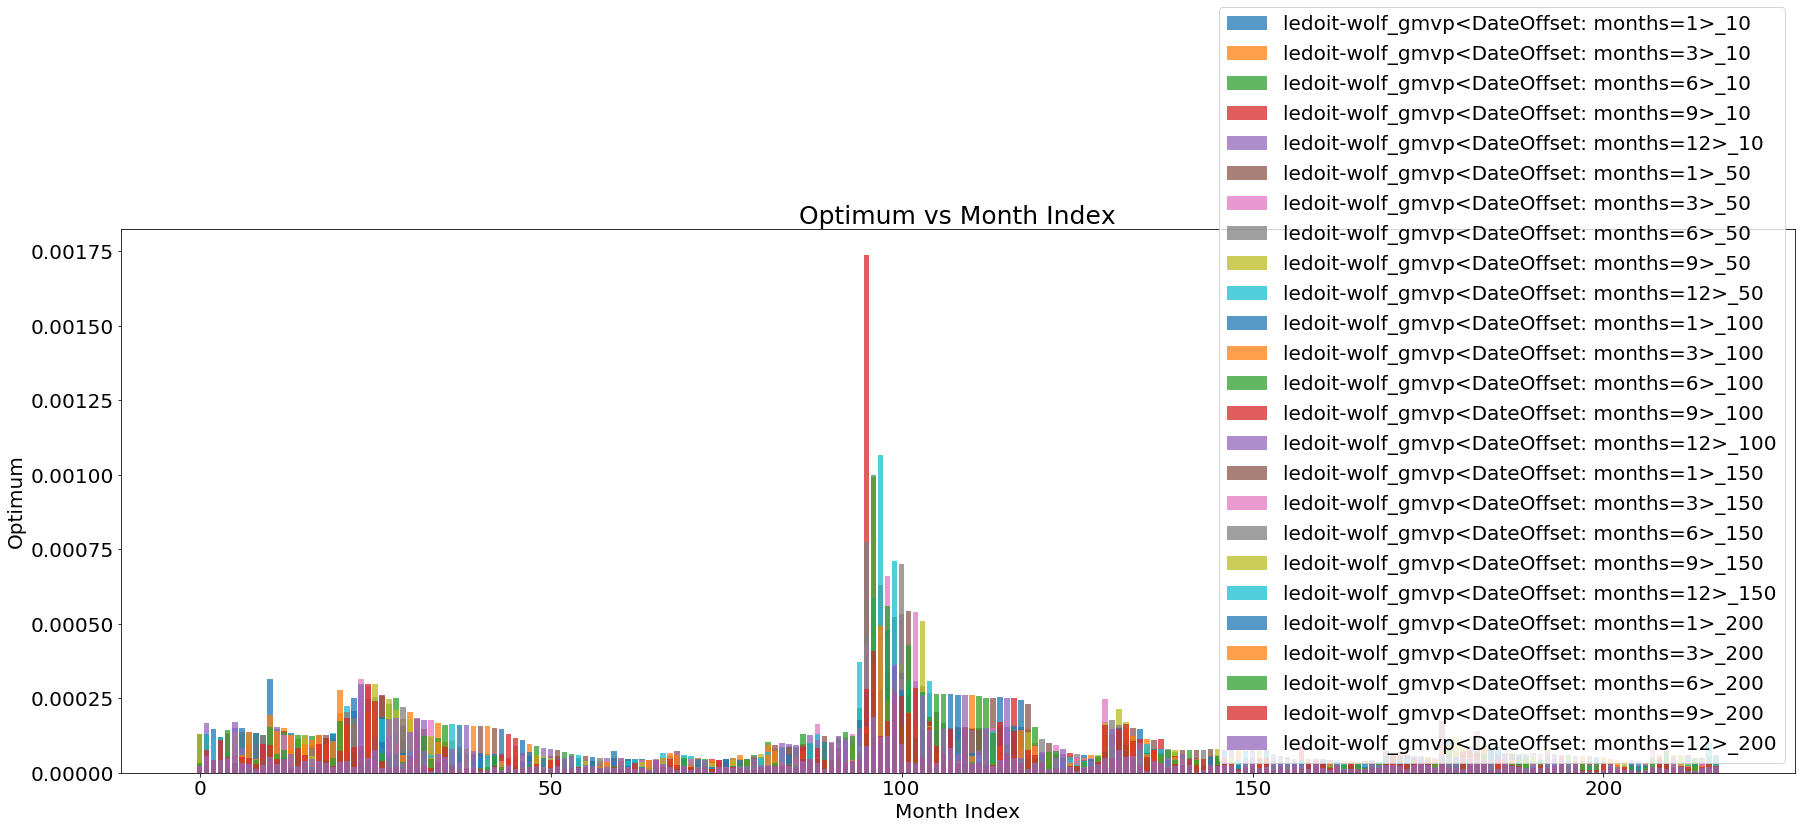

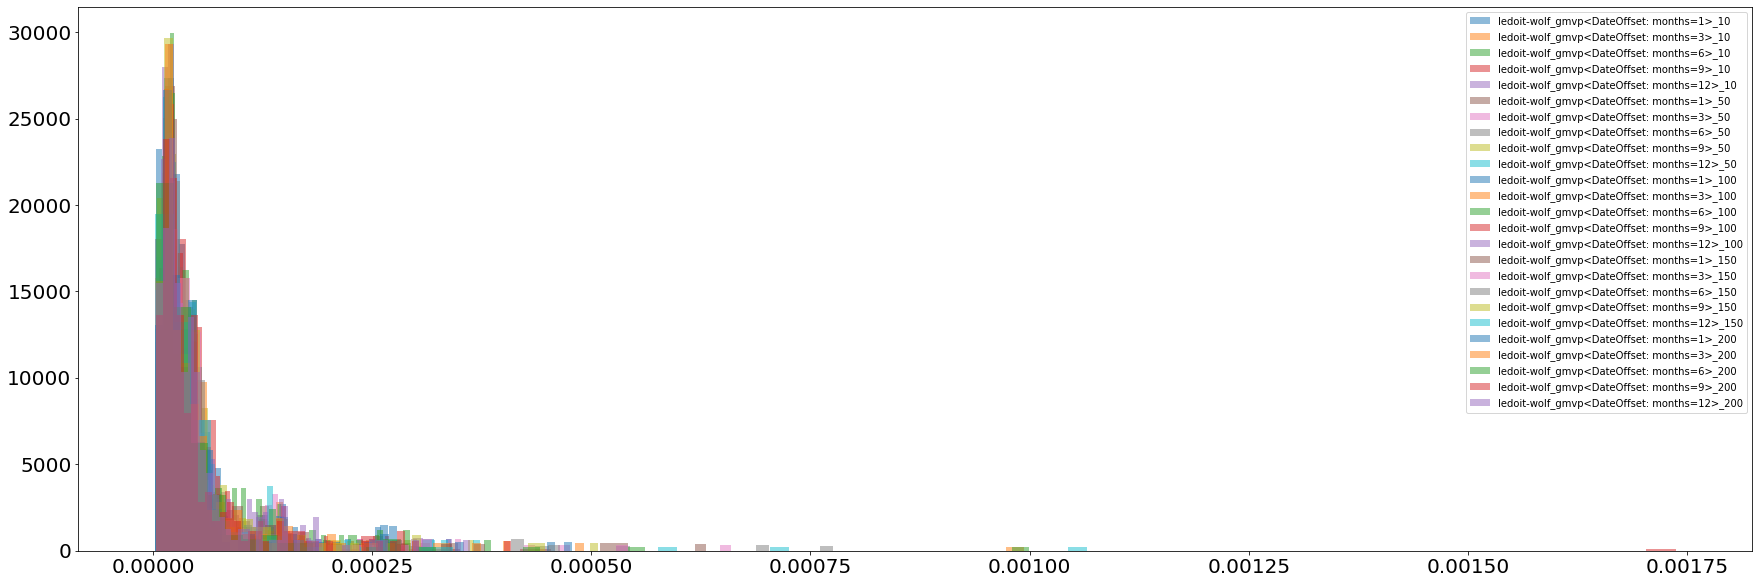

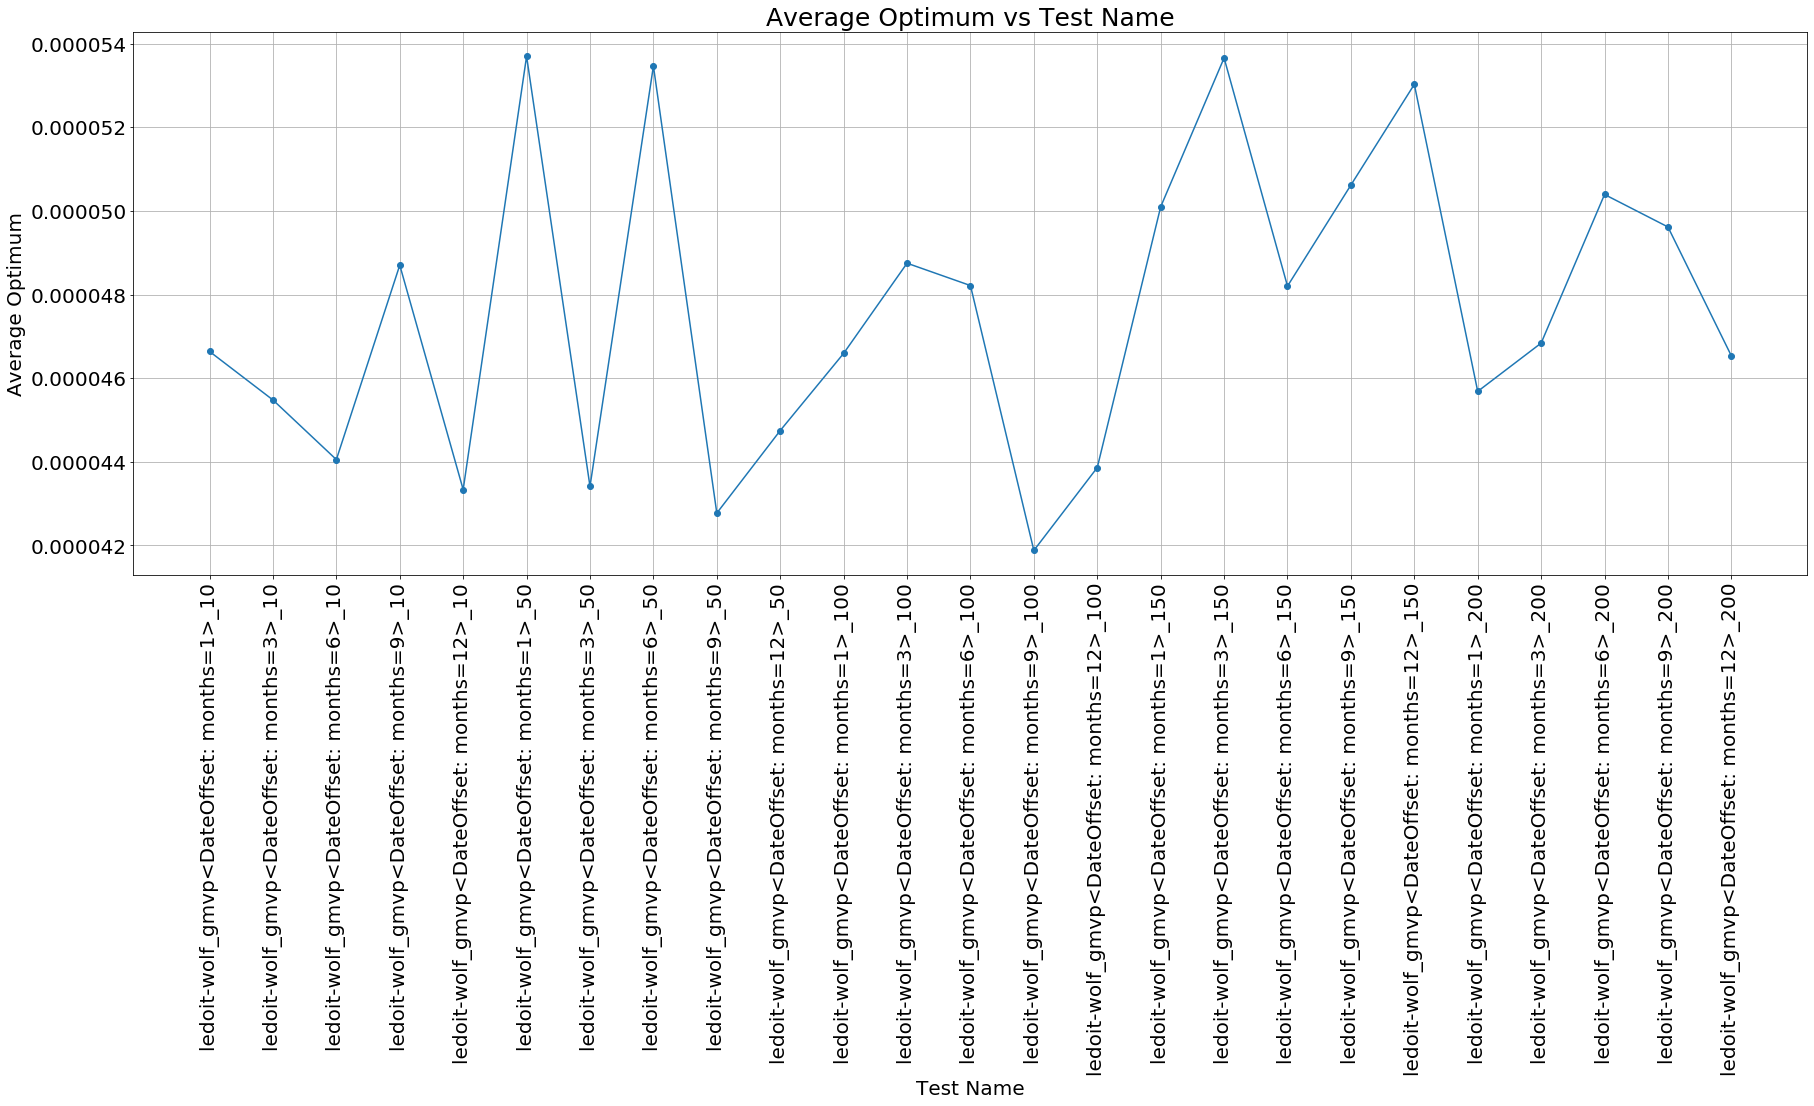

0

In [19]:
strat_res.show_results(result, covariance_methods, test_container, show_return_graph=True,
                       show_value_added_graph=False,
                       show_optimum_graph=True, 
                      show_optimum_vs_period_graph=True)

final number of observations: 4409
final number of observations: 4409
final number of observations: 4409
final number of observations: 4409
final number of observations: 4409

sample_gmvp<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
RIE_gmvp<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
sample_gmvp<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
RIE_gmvp<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
sample_gmvp<DateOffset: months=6>_100
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_gmvp<DateOffset: months=6>_100
0% [############################# ] 100% | ETA: 00:00:00
RIE_gmvp<DateOffset: months=6>_100
0% [######################

<Figure size 432x288 with 0 Axes>

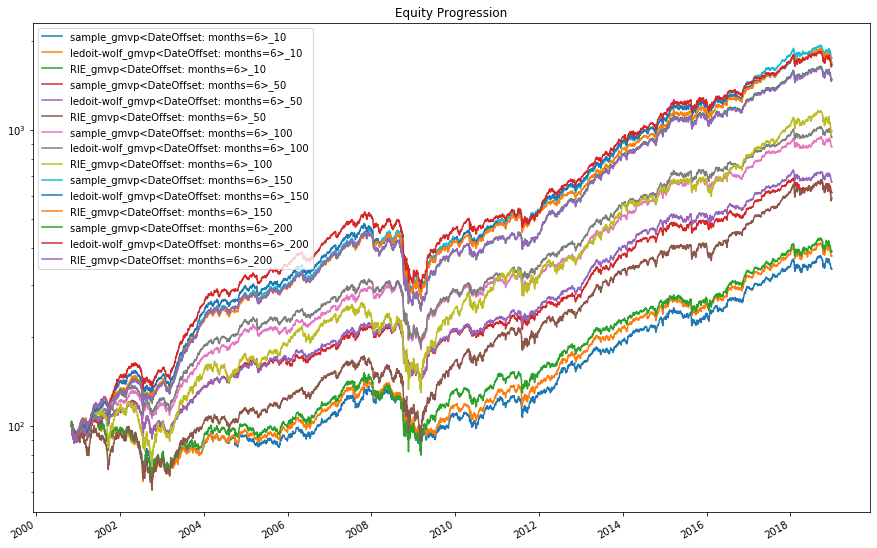

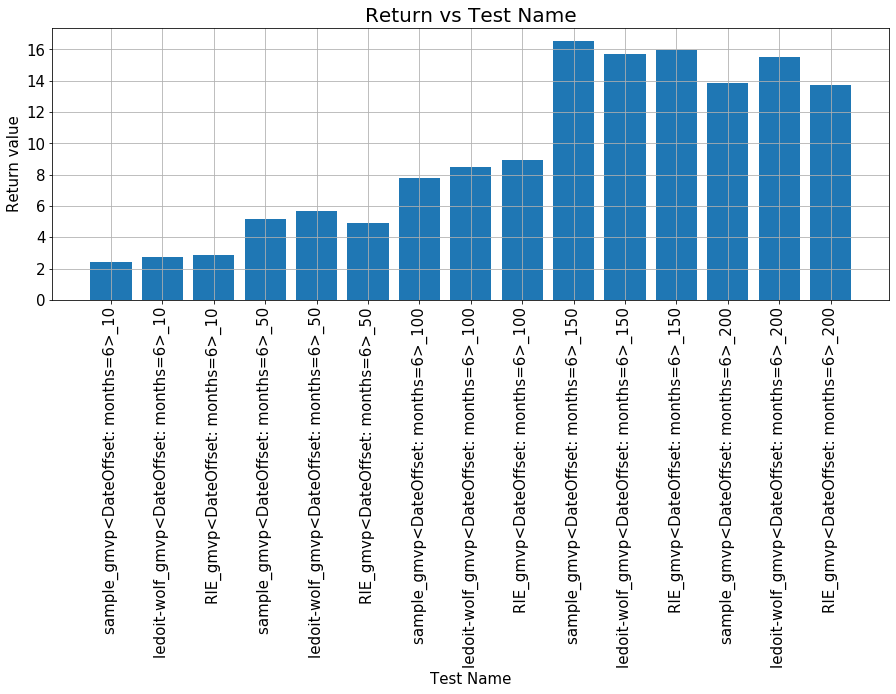

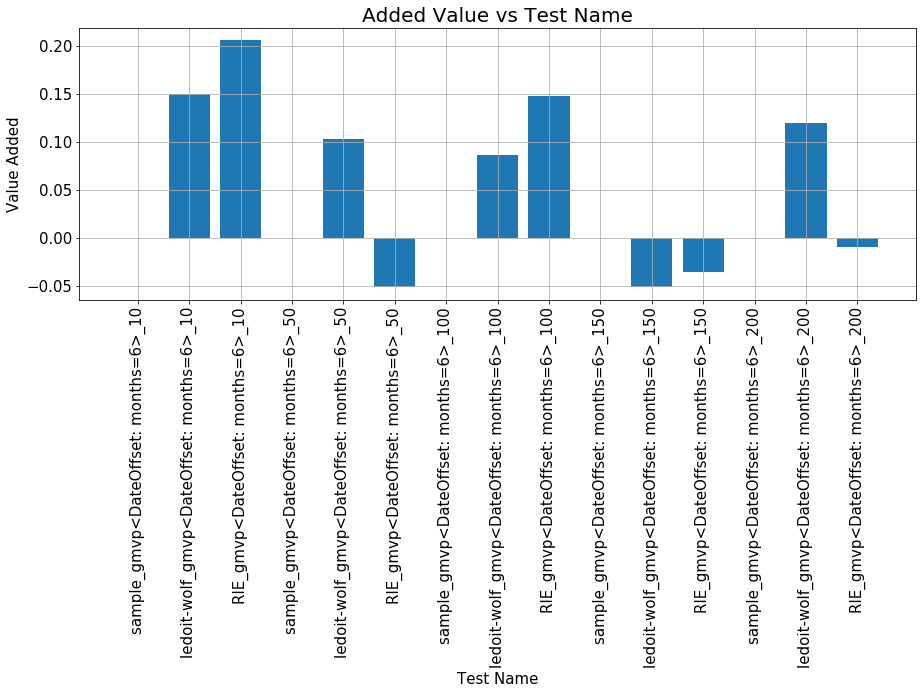

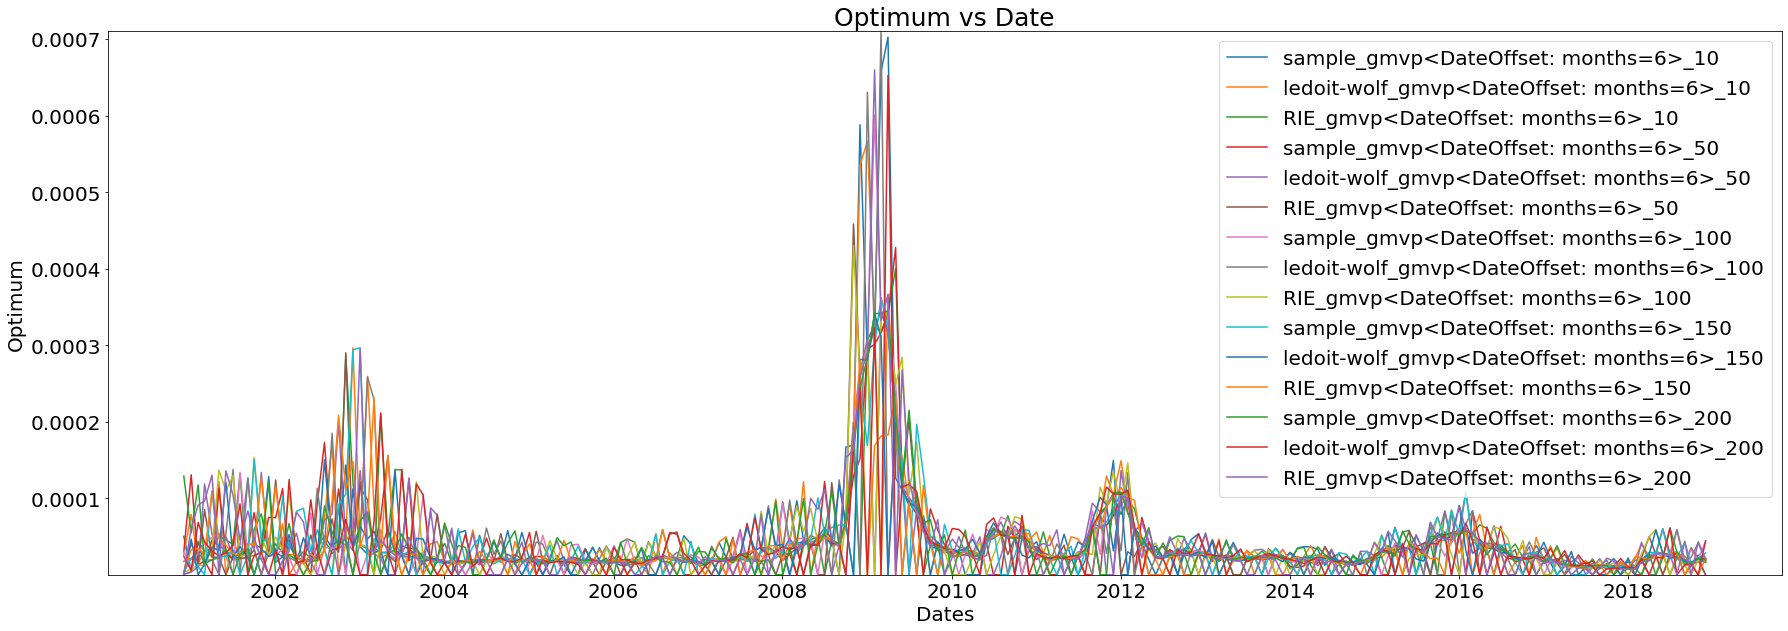

0

In [8]:
weight_strategy_names = ['gmvp']

covariance_methods = ['sample', 'ledoit-wolf', 'RIE']
number_of_assets = [10, 50 , 100, 150, 200]
lookback_periods=[pd.DateOffset(months=6)]
lag_times = [pd.DateOffset(months=0)]
# q is quantity (number of shares)
# p is price
#commission_fn_a = lambda q, p: q * p * 0.002
commission_functions = [None]
strat_res.OPTIMUM_CONTAINER = {'date': [], 'value': []}
strategy_container, test_container = strat_res.build_test(number_of_assets, 
                data,
                # optimum_container=optimum_container, 
                covariance_methods=covariance_methods,
                weight_strategy_names=weight_strategy_names, 
                commission_functions=commission_functions,
                lookback_periods=lookback_periods, lag_times=lag_times,
                add_random_strategy=False, add_one_over_n_strategy=False,)
result = bt.run(*test_container)
strat_res.show_results(result, covariance_methods, test_container, show_return_graph=True,
                       show_value_added_graph=True,
                       show_optimum_graph=True)

### Evaluating Different Strategies with Best Estimator

The following MDP strategy is a custom Maximum Diversification Portfolio strategy that was developed during the these experiments. We backtest the strategy with the best performing estimator against a 1/n strategy and a GMVP strategy. 

final number of observations: 4409
final number of observations: 4409
final number of observations: 4409
final number of observations: 4409
final number of observations: 4409

ledoit-wolf_mdp_original<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_mdp_D<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_one_over_n<DateOffset: months=6>_10
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_mdp_original<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_mdp_D<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_one_over_n<DateOffset: months=6>_50
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_mdp_original<DateOffset: months=6>_100
0% [############################# ] 100% | ETA: 00:00:00
ledoit-wolf_mdp_D<DateOffset: months=6>_100
0% [############################# ] 100% | ETA: 

<Figure size 432x288 with 0 Axes>

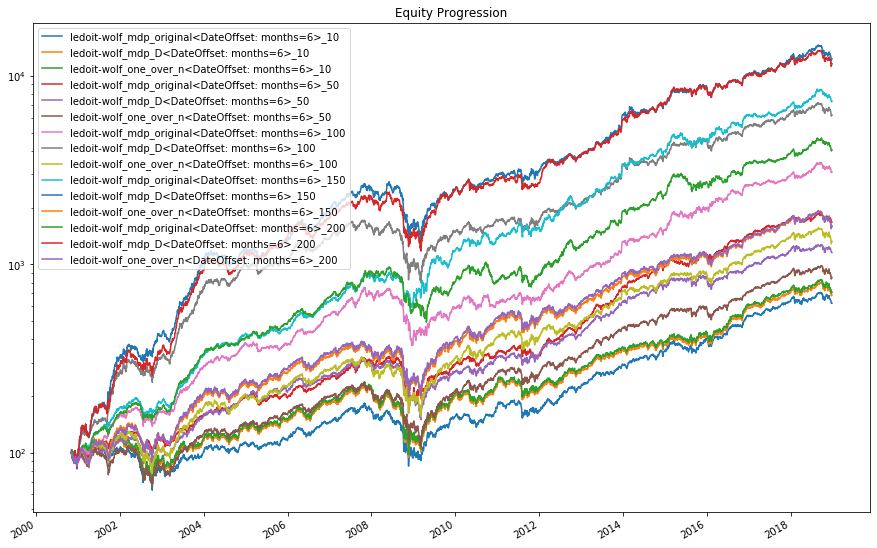

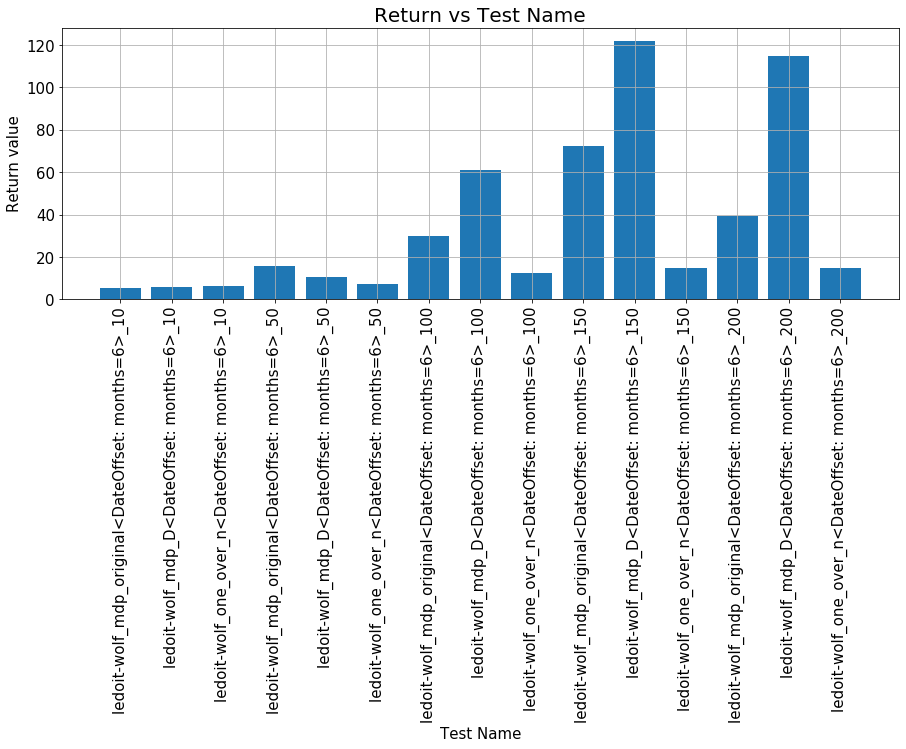

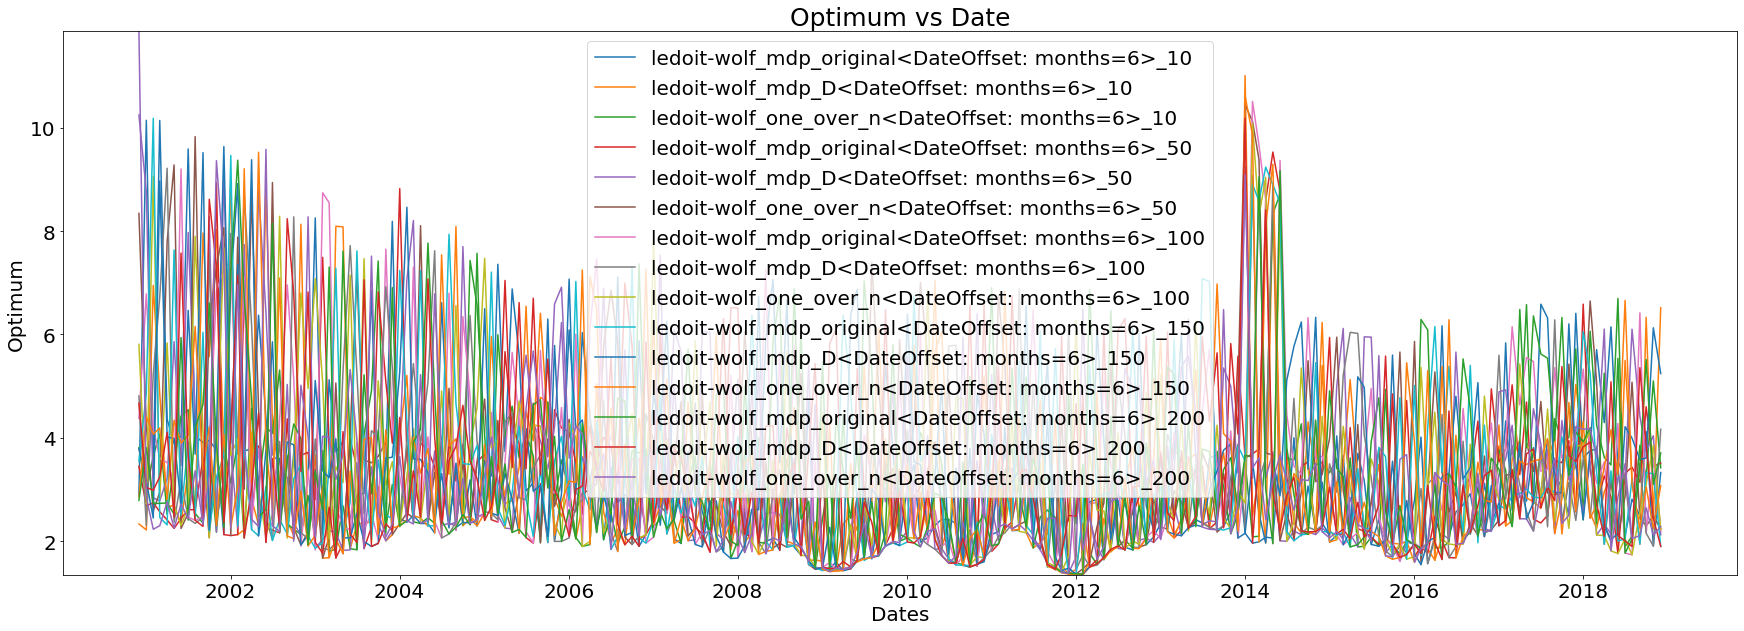

0

In [8]:
weight_strategy_names = ['mdp_original', 'mdp_D', 'one_over_n']

covariance_methods = ['ledoit-wolf']
number_of_assets = [10, 50, 100, 150, 200]
lookback_periods=[pd.DateOffset(months=6)]
lag_times = [pd.DateOffset(months=0)]
# q is quantity (number of shares)
# p is price
#commission_fn_a = lambda q, p: q * p * 0.002
commission_functions = [None]
strat_res.OPTIMUM_CONTAINER = {'date': [], 'value': []}
if test_container:
    del test_container
if strategy_container:
    del strategy_container
strategy_container, test_container = strat_res.build_test(number_of_assets, 
                data,
                # optimum_container=optimum_container, 
                covariance_methods=covariance_methods,
                weight_strategy_names=weight_strategy_names, 
                commission_functions=commission_functions,
                lookback_periods=lookback_periods, lag_times=lag_times,
                add_random_strategy=False, add_one_over_n_strategy=False,
                )
if result:
    del result
result = bt.run(*test_container)
strat_res.show_results(result, covariance_methods, test_container, show_return_graph=True,
                       show_value_added_graph=False,
                       show_optimum_graph=True)

It's possible to note that as we raise the number of assets, 'mdp_D' performs better than all other strategies in terms of portfolio returns. 

The test below evaluates strategies 'mdp_original' and 'mdp_D' on a scenario where a large number of assets is used. The main goal is to get a clearer picture of the optimum variations. 

In [ ]:
weight_strategy_names = ['mdp_original', 'mdp_D']

covariance_methods = ['ledoit-wolf']
number_of_assets = [150]
lookback_periods=[pd.DateOffset(months=1), pd.DateOffset(months=3), pd.DateOffset(months=6),
                  pd.DateOffset(months=9), pd.DateOffset(months=12),
                 ]
lag_times = [pd.DateOffset(months=0)]
# q is quantity (number of shares)
# p is price
#commission_fn_a = lambda q, p: q * p * 0.002
commission_functions = [None]
strat_res.OPTIMUM_CONTAINER = {'date': [], 'value': []}
strategy_container, test_container = strat_res.build_test(number_of_assets, 
                data,
                # optimum_container=optimum_container, 
                covariance_methods=covariance_methods,
                weight_strategy_names=weight_strategy_names, 
                commission_functions=commission_functions,
                lookback_periods=lookback_periods, lag_times=lag_times,
                add_random_strategy=False, add_one_over_n_strategy=False,)
result = bt.run(*test_container)
strat_res.show_results(result, covariance_methods, test_container, show_return_graph=True,
                       show_value_added_graph=False,
                       show_optimum_graph=True, 
                      show_optimum_vs_period_graph=True)

<Figure size 432x288 with 0 Axes>

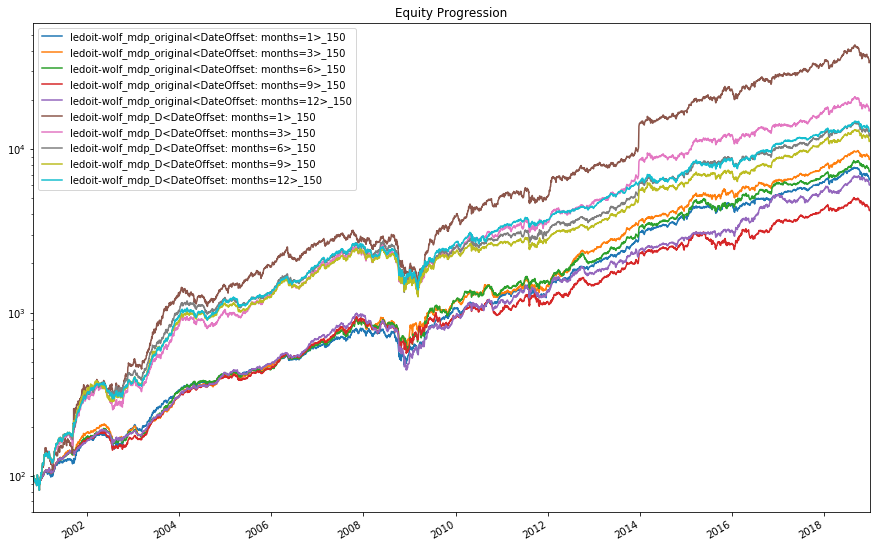

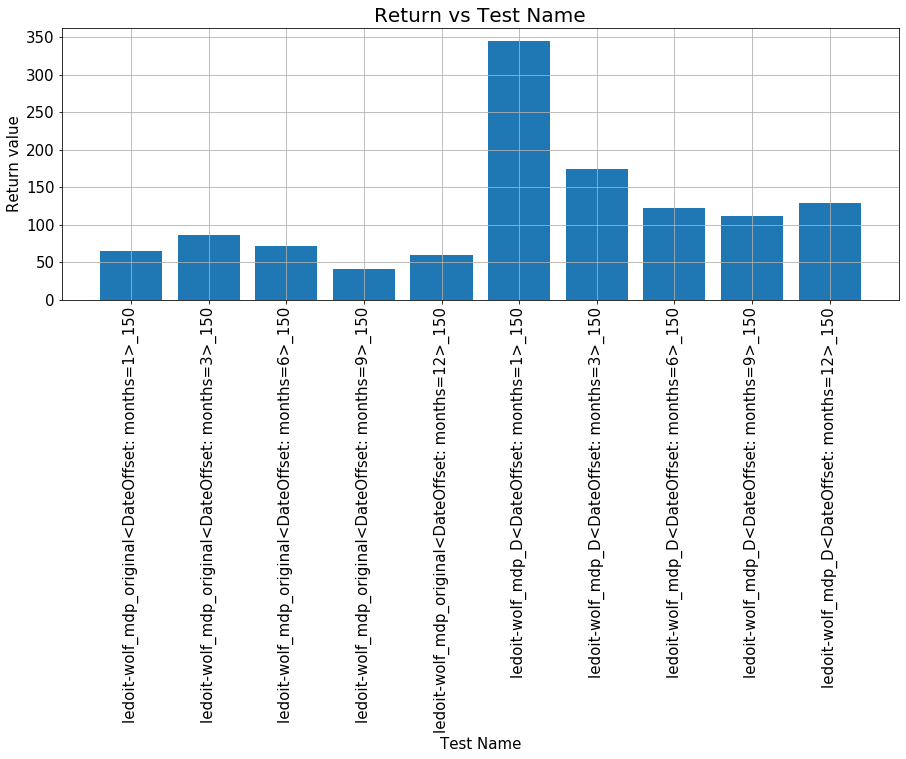

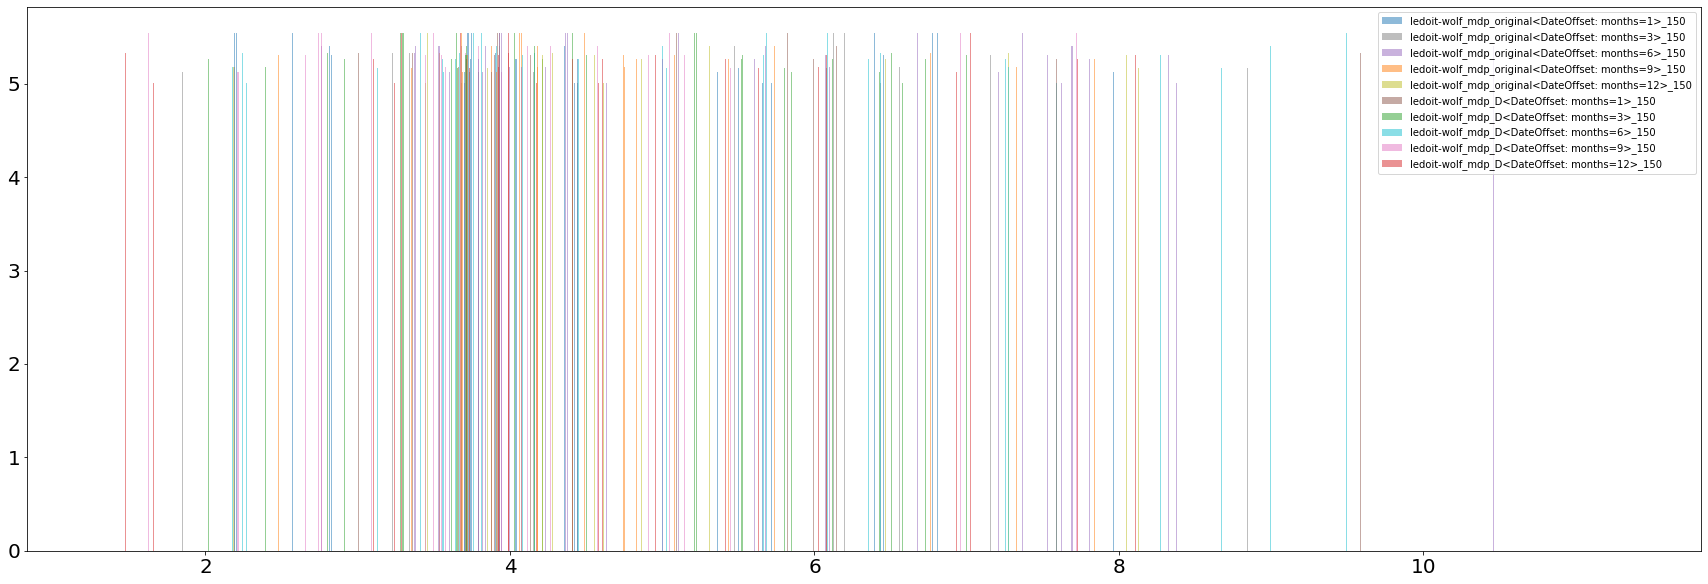

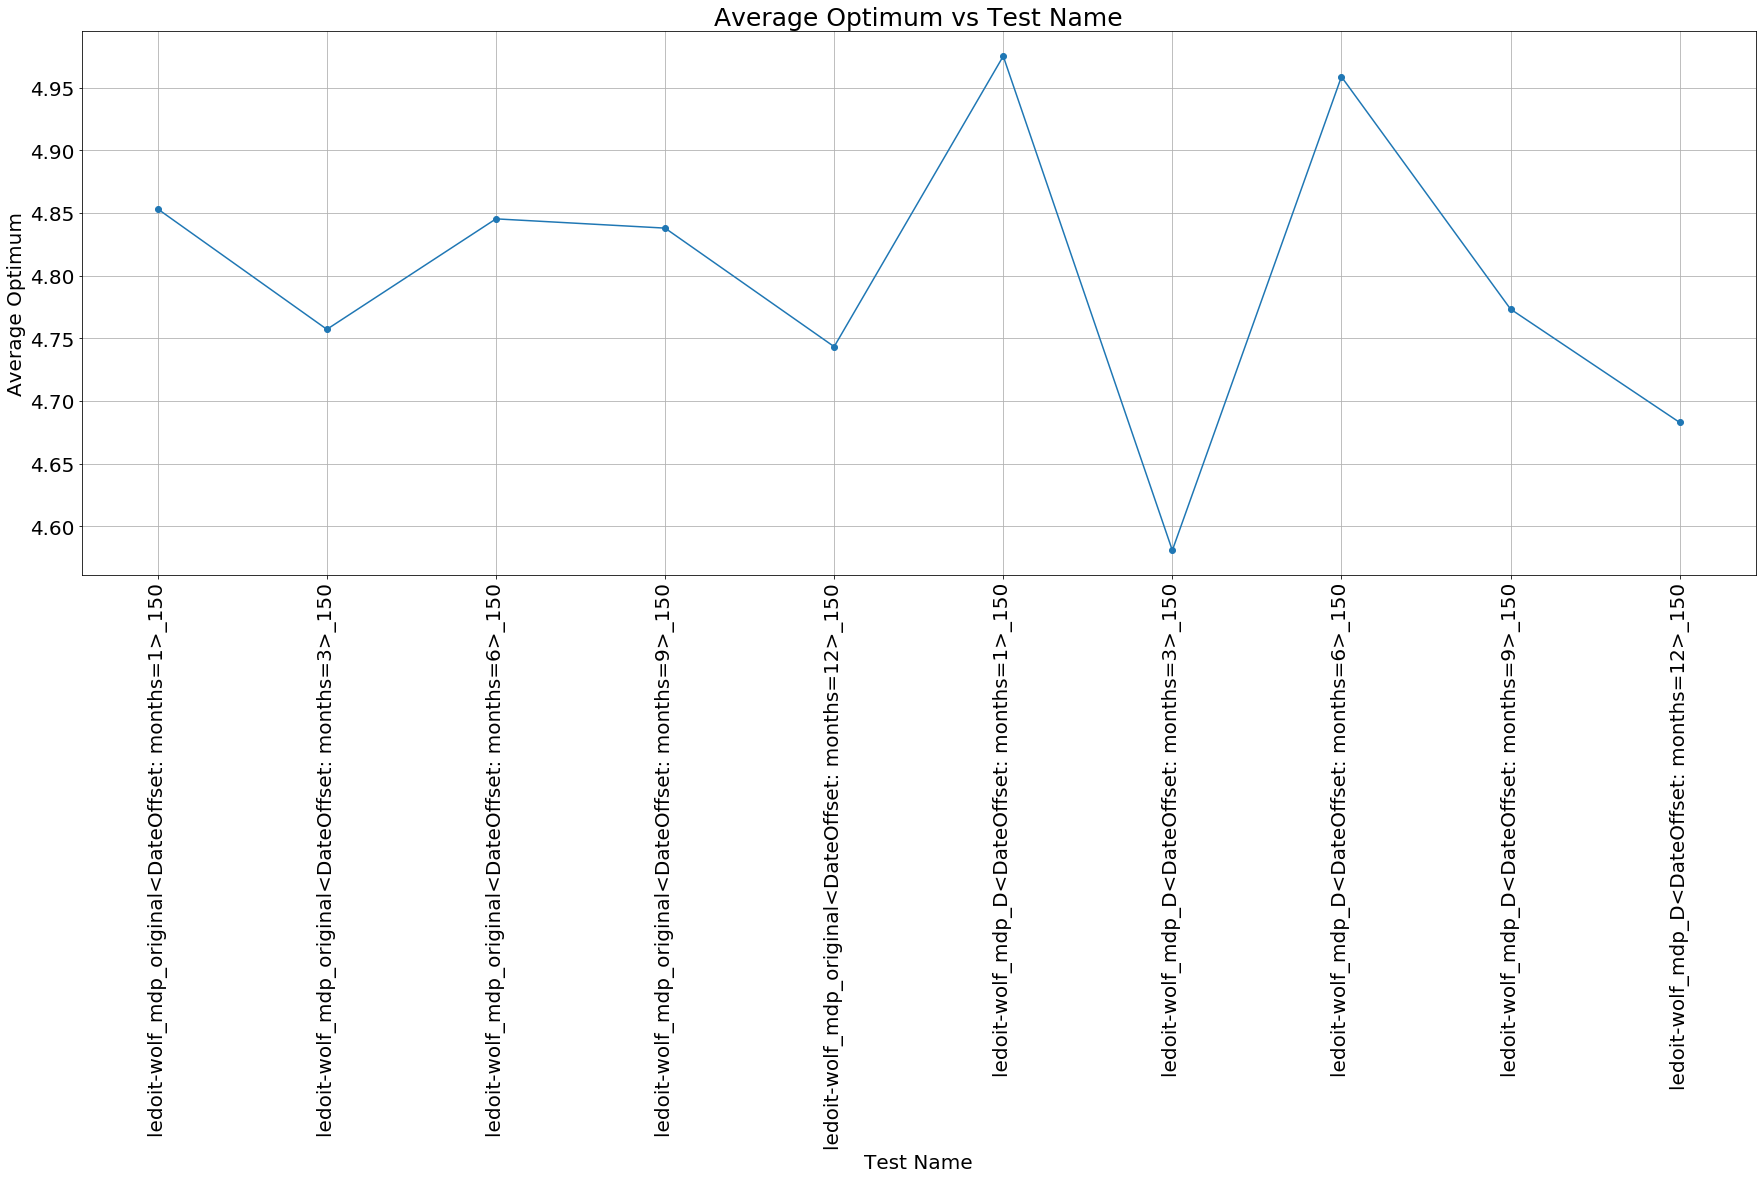

0

In [14]:
strat_res.show_results(result, covariance_methods, test_container, show_return_graph=True,
                       show_value_added_graph=False,
                       show_optimum_graph=False, 
                      show_optimum_vs_period_graph=True)